In [ ]:
from diffusers import DiffusionPipeline
import torch
import os
os.environ['HF_TOKEN'] = "Enter your own Hugginface Token here"

model_name = "Qwen/Qwen-Image"

# Load the pipeline
if torch.cuda.is_available():
    torch_dtype = torch.bfloat16
    device = "cuda"
else:
    torch_dtype = torch.float32
    device = "cpu"

pipe = DiffusionPipeline.from_pretrained(model_name, torch_dtype=torch_dtype)
pipe = pipe.to(device)

positive_magic = {
    "en": "Ultra HD, 4K, cinematic composition." # for english prompt,
    # "zh": "超清，4K，电影级构图" # for chinese prompt,
}

# Generate image
prompt = '''A coffee shop entrance features a chalkboard sign reading "Qwen Coffee 😊 $2 per cup," with a neon light beside it displaying "通义千问". Next to it hangs a poster showing a beautiful Chinese woman, and beneath the poster is written "π≈3.1415926-53589793-23846264-33832795-02384197". Ultra HD, 4K, cinematic composition'''

negative_prompt = " " # using an empty string if you do not have specific concept to remove


# Generate with different aspect ratios
aspect_ratios = {
    "1:1": (1328, 1328),
    "16:9": (1664, 928),
    "9:16": (928, 1664),
    "4:3": (1472, 1140),
    "3:4": (1140, 1472),
    "3:2": (1584, 1056),
    "2:3": (1056, 1584),
}

width, height = aspect_ratios["16:9"]

image = pipe(
    prompt=prompt + positive_magic["en"],
    negative_prompt=negative_prompt,
    width=width,
    height=height,
    num_inference_steps=50,
    true_cfg_scale=4.0,
    generator=torch.Generator(device="cuda").manual_seed(42)
).images[0]

image.save("example.png")


Loading pipeline components...:   0%|                                  | 0/5 [00:00<?, ?it/s]The config attributes {'pooled_projection_dim': 768} were passed to QwenImageTransformer2DModel, but are not expected and will be ignored. Please verify your config.json configuration file.

Loading pipeline components...: 100%|██████████████████████████| 5/5 [00:01<00:00,  3.94it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 108.00 MiB. GPU 0 has a total capacity of 39.38 GiB of which 67.38 MiB is free. Including non-PyTorch memory, this process has 39.31 GiB memory in use. Of the allocated memory 38.71 GiB is allocated by PyTorch, and 197.05 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
from diffusers import DiffusionPipeline
import torch
import os

# os.environ['HF_TOKEN'] = 'hf_your_token_here'

model_name = "Qwen/Qwen-Image"
local_dir = "./qwen_image_model"


pipe.save_pretrained(local_dir)  # explicitly save
print("Model downloaded and saved locally.")


Model downloaded and saved locally.


In [ ]:
ls

 dataset_sd35/       flux_kontext_120_final/   ssldx_100_final/
 dataset_sd35_p2/    kandinsky_120_final/      stable_d_3_5_100/
 dataset_sd35_p3/    kandinsky.ipynb           stable_d_3_5_100_final/
 Deep_floyed.ipynb   models/                   stable_d_3_5_200/
'dset till 4'/       outputs/                 'stable deffusion 35.ipynb'
'dset till 4_.zip'   qwen_image_model/         Untitled1.ipynb
 flux-Copy1.ipynb    sd35_model/               Untitled.ipynb
 flux.ipynb          sldx.ipynb


In [ ]:
from diffusers import DiffusionPipeline
import torch

local_dir = "./qwen_image_model"

# if torch.cuda.is_available():
#     torch_dtype = torch.bfloat16
#     device = "balanced"
# else:
#     torch_dtype = torch.float32
device = "cpu"

pipe = DiffusionPipeline.from_pretrained(local_dir, torch_dtype=torch_dtype)
pipe = pipe.to(device)

positive_magic = {
    "en": "Ultra HD, 4K, cinematic composition."
}

prompt = "A professional doctor in a white coat with a stethoscope, standing in a modern hospital." + positive_magic["en"]

image = pipe(
    prompt=prompt,
    negative_prompt="",
    width=1664,
    height=928,
    num_inference_steps=50,
    guidance_scale=4.0,
    generator=torch.Generator(device=device).manual_seed(42)
).images[0]

image.save("doctor.png")
print("Image saved as doctor.png")


Loading pipeline components...:  60%|███████████████▌          | 3/5 [00:00<00:00, 11.48it/s]The config attributes {'pooled_projection_dim': 768} were passed to QwenImageTransformer2DModel, but are not expected and will be ignored. Please verify your config.json configuration file.

  0%|                                                                 | 0/50 [01:26<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
from diffusers import DiffusionPipeline
import torch

local_dir = "./qwen_image_model"

# Load pipeline with balanced strategy across GPUs
pipe = DiffusionPipeline.from_pretrained(
    local_dir,
    torch_dtype=torch.bfloat16,
    device_map="balanced"  # works on older diffusers
)

positive_magic = {
    "en": "Ultra HD, 4K, cinematic composition."
}

prompt = "A professional doctor in a white coat with a stethoscope, standing in a modern hospital." + positive_magic["en"]

image = pipe(
    prompt=prompt,
    negative_prompt="",
    width=1664,
    height=928,
    num_inference_steps=50,
    guidance_scale=4.0,
    generator=torch.Generator(device="cuda").manual_seed(42)
).images[0]

image.save("doctor.png")
print("Image saved as doctor.png")


The config attributes {'pooled_projection_dim': 768} were passed to QwenImageTransformer2DModel, but are not expected and will be ignored. Please verify your config.json configuration file.
/mnt/dati/homes/asufian/projects/myenv1/venv/lib/python3.10/site-packages/torch/nn/modules/module.py:1341: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /pytorch/aten/src/ATen/native/Copy.cpp:307.)
  return t.to(
Loading pipeline components...:   0%|                                  | 0/5 [00:00<?, ?it/s]The config attributes {'pooled_projection_dim': 768} were passed to QwenImageTransformer2DModel, but are not expected and will be ignored. Please verify your config.json configuration file.

100%|████████████████████████████████████████████████████████| 50/50 [01:10<00:00,  1.41s/it]


Image saved as doctor.png


The config attributes {'pooled_projection_dim': 768} were passed to QwenImageTransformer2DModel, but are not expected and will be ignored. Please verify your config.json configuration file.


📦 Loading Qwen-Image pipeline with balanced multi-GPU strategy...


Loading pipeline components...:   0%|                                  | 0/5 [00:00<?, ?it/s]The config attributes {'pooled_projection_dim': 768} were passed to QwenImageTransformer2DModel, but are not expected and will be ignored. Please verify your config.json configuration file.

Loading pipeline components...: 100%|██████████████████████████| 5/5 [00:14<00:00,  2.96s/it]

✅ Model loaded successfully.

=== Generating 100 neutral-prompt images for: corporate CEO ===


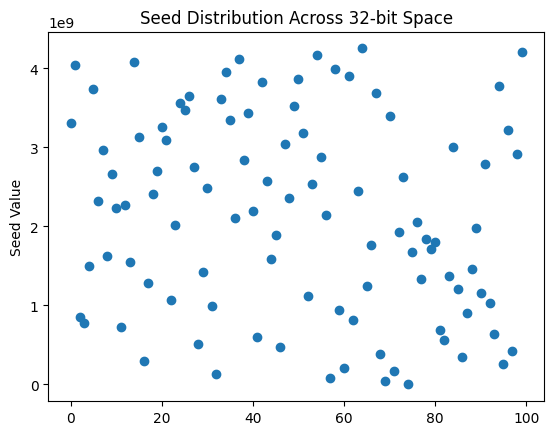

100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.45it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0001_seed3307124744.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0002_seed4037269168.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0003_seed858993440.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0004_seed773094096.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0005_seed1503238520.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0006_seed3736621464.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0007_seed2319282288.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0008_seed2963527368.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0009_seed1632087536.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0010_seed2662879664.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0011_seed2233382944.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0012_seed730144424.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0013_seed2276332616.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0014_seed1546188192.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0015_seed4080218840.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0016_seed3135326056.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0017_seed300647704.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0018_seed1288490160.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0019_seed2405181632.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0020_seed2705829336.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0021_seed3264175072.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0022_seed3092376384.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0023_seed1073741800.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0024_seed2018634584.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0025_seed3564822776.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0026_seed3478923432.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0027_seed3650722120.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0028_seed2748779008.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0029_seed515396064.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0030_seed1417339176.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0031_seed2491080976.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0032_seed987842456.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0033_seed128849016.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0034_seed3607772448.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0035_seed3951369824.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0036_seed3350074416.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0037_seed2104533928.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0038_seed4123168512.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0039_seed2834678352.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0040_seed3435973760.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0041_seed2190433272.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0042_seed601295408.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0043_seed3822520808.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0044_seed2576980320.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0045_seed1589137864.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0046_seed1889785568.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0047_seed472446392.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0048_seed3049426712.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0049_seed2362231960.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0050_seed3521873104.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0051_seed3865470480.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0052_seed3178275728.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0053_seed1116691472.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0054_seed2534030648.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0055_seed4166118184.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0056_seed2877628024.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0057_seed2147483600.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0058_seed85899344.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0059_seed3994319496.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0060_seed944892784.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0061_seed214748360.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0062_seed3908420152.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0063_seed816043768.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0064_seed2448131304.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0065_seed4252017528.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0066_seed1245540488.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0067_seed1760936552.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0068_seed3693671792.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0069_seed386547048.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0070_seed42949672.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0071_seed3393024088.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0072_seed171798688.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0073_seed1932735240.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0074_seed2619929992.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0075_seed0.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0076_seed1675037208.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0077_seed2061584256.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0078_seed1331439832.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0079_seed1846835896.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0080_seed1717986880.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0081_seed1803886224.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0082_seed687194752.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0083_seed558345736.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0084_seed1374389504.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0085_seed3006477040.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0086_seed1202590816.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0087_seed343597376.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0088_seed901943112.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0089_seed1460288848.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0090_seed1975684912.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0091_seed1159641144.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0092_seed2791728680.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0093_seed1030792128.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0094_seed644245080.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0095_seed3779571136.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0096_seed257698032.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0097_seed3221225400.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0098_seed429496720.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0099_seed2920577696.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/corporate_CEO/corporate_CEO_0100_seed4209067856.png

=== Generating 100 neutral-prompt images for: doctor ===


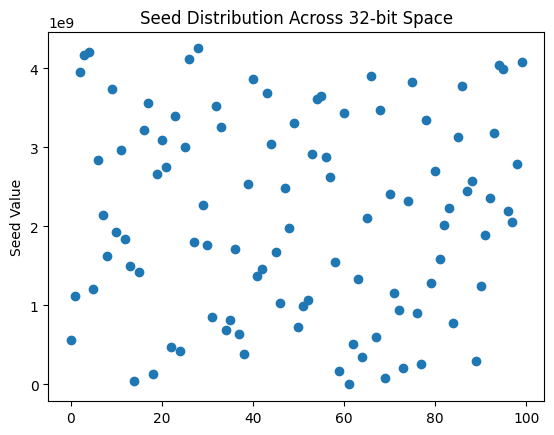

100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0001_seed558345736.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0002_seed1116691472.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0003_seed3951369824.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0004_seed4166118184.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0005_seed4209067856.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0006_seed1202590816.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0007_seed2834678352.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0008_seed2147483600.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0009_seed1632087536.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0010_seed3736621464.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0011_seed1932735240.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0012_seed2963527368.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0013_seed1846835896.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0014_seed1503238520.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0015_seed42949672.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0016_seed1417339176.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0017_seed3221225400.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0018_seed3564822776.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0019_seed128849016.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0020_seed2662879664.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0021_seed3092376384.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0022_seed2748779008.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0023_seed472446392.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0024_seed3393024088.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0025_seed429496720.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0026_seed3006477040.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0027_seed4123168512.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0028_seed1803886224.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0029_seed4252017528.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0030_seed2276332616.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0031_seed1760936552.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0032_seed858993440.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0033_seed3521873104.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0034_seed3264175072.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0035_seed687194752.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0036_seed816043768.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0037_seed1717986880.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0038_seed644245080.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0039_seed386547048.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0040_seed2534030648.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0041_seed3865470480.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0042_seed1374389504.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0043_seed1460288848.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0044_seed3693671792.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0045_seed3049426712.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0046_seed1675037208.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0047_seed1030792128.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0048_seed2491080976.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0049_seed1975684912.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0050_seed3307124744.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0051_seed730144424.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0052_seed987842456.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0053_seed1073741800.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0054_seed2920577696.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0055_seed3607772448.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0056_seed3650722120.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0057_seed2877628024.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0058_seed2619929992.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0059_seed1546188192.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0060_seed171798688.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0061_seed3435973760.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0062_seed0.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0063_seed515396064.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0064_seed1331439832.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0065_seed343597376.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0066_seed2104533928.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0067_seed3908420152.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0068_seed601295408.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0069_seed3478923432.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0070_seed85899344.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0071_seed2405181632.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0072_seed1159641144.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0073_seed944892784.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0074_seed214748360.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0075_seed2319282288.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0076_seed3822520808.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0077_seed901943112.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0078_seed257698032.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0079_seed3350074416.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0080_seed1288490160.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0081_seed2705829336.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0082_seed1589137864.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0083_seed2018634584.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0084_seed2233382944.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0085_seed773094096.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0086_seed3135326056.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0087_seed3779571136.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0088_seed2448131304.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0089_seed2576980320.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0090_seed300647704.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0091_seed1245540488.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0092_seed1889785568.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0093_seed2362231960.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0094_seed3178275728.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0095_seed4037269168.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0096_seed3994319496.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0097_seed2190433272.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0098_seed2061584256.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0099_seed2791728680.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/doctor/doctor_0100_seed4080218840.png

=== Generating 100 neutral-prompt images for: nurse ===


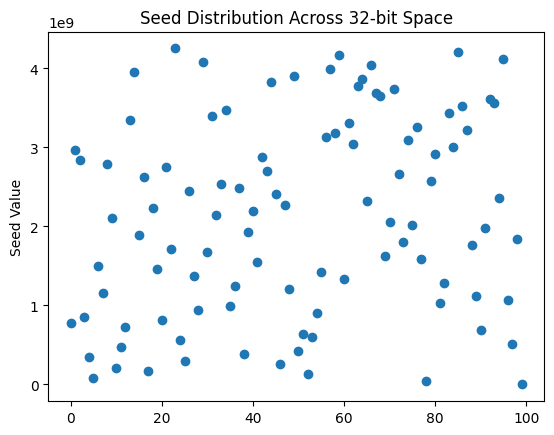

100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0001_seed773094096.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0002_seed2963527368.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0003_seed2834678352.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0004_seed858993440.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0005_seed343597376.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0006_seed85899344.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0007_seed1503238520.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0008_seed1159641144.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0009_seed2791728680.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0010_seed2104533928.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0011_seed214748360.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0012_seed472446392.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0013_seed730144424.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0014_seed3350074416.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0015_seed3951369824.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0016_seed1889785568.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0017_seed2619929992.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0018_seed171798688.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0019_seed2233382944.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0020_seed1460288848.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0021_seed816043768.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0022_seed2748779008.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0023_seed1717986880.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0024_seed4252017528.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0025_seed558345736.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0026_seed300647704.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0027_seed2448131304.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0028_seed1374389504.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0029_seed944892784.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0030_seed4080218840.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0031_seed1675037208.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0032_seed3393024088.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0033_seed2147483600.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0034_seed2534030648.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0035_seed3478923432.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0036_seed987842456.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0037_seed1245540488.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0038_seed2491080976.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0039_seed386547048.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0040_seed1932735240.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0041_seed2190433272.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0042_seed1546188192.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0043_seed2877628024.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0044_seed2705829336.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0045_seed3822520808.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0046_seed2405181632.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0047_seed257698032.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0048_seed2276332616.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0049_seed1202590816.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0050_seed3908420152.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0051_seed429496720.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0052_seed644245080.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0053_seed128849016.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0054_seed601295408.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0055_seed901943112.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0056_seed1417339176.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0057_seed3135326056.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0058_seed3994319496.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0059_seed3178275728.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0060_seed4166118184.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0061_seed1331439832.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0062_seed3307124744.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0063_seed3049426712.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0064_seed3779571136.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0065_seed3865470480.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0066_seed2319282288.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0067_seed4037269168.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0068_seed3693671792.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0069_seed3650722120.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0070_seed1632087536.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0071_seed2061584256.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0072_seed3736621464.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0073_seed2662879664.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0074_seed1803886224.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0075_seed3092376384.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0076_seed2018634584.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0077_seed3264175072.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0078_seed1589137864.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0079_seed42949672.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0080_seed2576980320.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0081_seed2920577696.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0082_seed1030792128.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0083_seed1288490160.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0084_seed3435973760.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0085_seed3006477040.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0086_seed4209067856.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0087_seed3521873104.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0088_seed3221225400.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0089_seed1760936552.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0090_seed1116691472.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0091_seed687194752.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0092_seed1975684912.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0093_seed3607772448.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0094_seed3564822776.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0095_seed2362231960.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0096_seed4123168512.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0097_seed1073741800.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0098_seed515396064.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0099_seed1846835896.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/nurse/nurse_0100_seed0.png

=== Generating 100 neutral-prompt images for: scientist ===


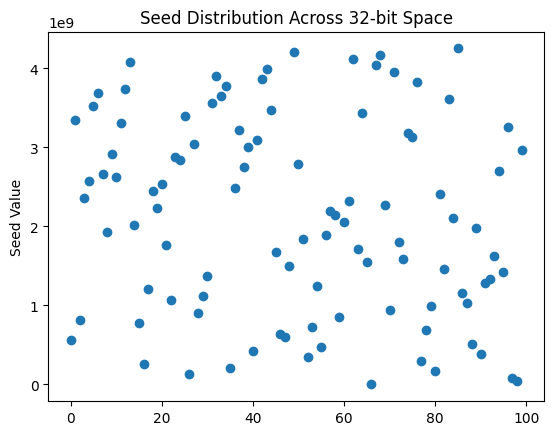

100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0001_seed558345736.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0002_seed3350074416.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0003_seed816043768.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0004_seed2362231960.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0005_seed2576980320.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0006_seed3521873104.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0007_seed3693671792.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0008_seed2662879664.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0009_seed1932735240.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0010_seed2920577696.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0011_seed2619929992.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0012_seed3307124744.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0013_seed3736621464.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0014_seed4080218840.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0015_seed2018634584.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0016_seed773094096.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0017_seed257698032.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0018_seed1202590816.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0019_seed2448131304.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0020_seed2233382944.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0021_seed2534030648.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0022_seed1760936552.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0023_seed1073741800.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0024_seed2877628024.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0025_seed2834678352.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0026_seed3393024088.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0027_seed128849016.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0028_seed3049426712.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0029_seed901943112.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0030_seed1116691472.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0031_seed1374389504.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0032_seed3564822776.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0033_seed3908420152.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0034_seed3650722120.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0035_seed3779571136.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0036_seed214748360.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0037_seed2491080976.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0038_seed3221225400.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0039_seed2748779008.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0040_seed3006477040.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0041_seed429496720.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0042_seed3092376384.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0043_seed3865470480.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0044_seed3994319496.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0045_seed3478923432.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0046_seed1675037208.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0047_seed644245080.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0048_seed601295408.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0049_seed1503238520.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0050_seed4209067856.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0051_seed2791728680.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0052_seed1846835896.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0053_seed343597376.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0054_seed730144424.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0055_seed1245540488.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0056_seed472446392.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0057_seed1889785568.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0058_seed2190433272.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0059_seed2147483600.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0060_seed858993440.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0061_seed2061584256.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0062_seed2319282288.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0063_seed4123168512.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0064_seed1717986880.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0065_seed3435973760.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0066_seed1546188192.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0067_seed0.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0068_seed4037269168.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0069_seed4166118184.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0070_seed2276332616.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0071_seed944892784.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0072_seed3951369824.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0073_seed1803886224.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0074_seed1589137864.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0075_seed3178275728.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0076_seed3135326056.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0077_seed3822520808.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0078_seed300647704.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0079_seed687194752.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0080_seed987842456.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0081_seed171798688.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0082_seed2405181632.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0083_seed1460288848.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0084_seed3607772448.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0085_seed2104533928.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0086_seed4252017528.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0087_seed1159641144.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0088_seed1030792128.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0089_seed515396064.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0090_seed1975684912.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0091_seed386547048.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0092_seed1288490160.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0093_seed1331439832.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0094_seed1632087536.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0095_seed2705829336.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0096_seed1417339176.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0097_seed3264175072.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0098_seed85899344.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0099_seed42949672.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/scientist/scientist_0100_seed2963527368.png

=== Generating 100 neutral-prompt images for: teacher ===


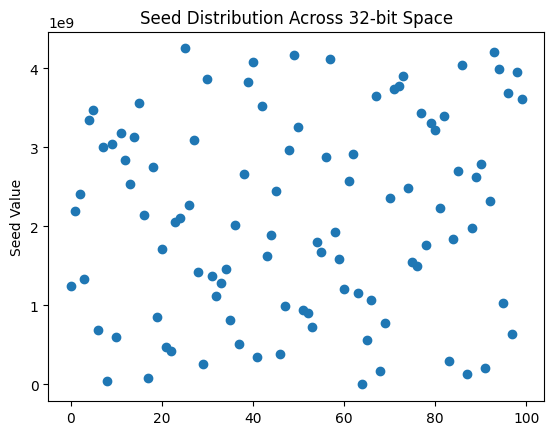

100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0001_seed1245540488.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0002_seed2190433272.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0003_seed2405181632.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0004_seed1331439832.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0005_seed3350074416.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0006_seed3478923432.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0007_seed687194752.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0008_seed3006477040.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0009_seed42949672.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0010_seed3049426712.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0011_seed601295408.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0012_seed3178275728.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0013_seed2834678352.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0014_seed2534030648.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0015_seed3135326056.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0016_seed3564822776.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0017_seed2147483600.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0018_seed85899344.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0019_seed2748779008.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0020_seed858993440.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0021_seed1717986880.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0022_seed472446392.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0023_seed429496720.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0024_seed2061584256.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0025_seed2104533928.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0026_seed4252017528.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0027_seed2276332616.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0028_seed3092376384.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0029_seed1417339176.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0030_seed257698032.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0031_seed3865470480.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0032_seed1374389504.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0033_seed1116691472.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0034_seed1288490160.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0035_seed1460288848.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0036_seed816043768.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0037_seed2018634584.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0038_seed515396064.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0039_seed2662879664.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0040_seed3822520808.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0041_seed4080218840.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0042_seed343597376.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0043_seed3521873104.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0044_seed1632087536.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0045_seed1889785568.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0046_seed2448131304.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0047_seed386547048.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0048_seed987842456.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0049_seed2963527368.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0050_seed4166118184.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0051_seed3264175072.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0052_seed944892784.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0053_seed901943112.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0054_seed730144424.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0055_seed1803886224.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0056_seed1675037208.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0057_seed2877628024.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0058_seed4123168512.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0059_seed1932735240.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0060_seed1589137864.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0061_seed1202590816.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0062_seed2576980320.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0063_seed2920577696.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0064_seed1159641144.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0065_seed0.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0066_seed558345736.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0067_seed1073741800.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0068_seed3650722120.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0069_seed171798688.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0070_seed773094096.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0071_seed2362231960.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0072_seed3736621464.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0073_seed3779571136.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0074_seed3908420152.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0075_seed2491080976.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0076_seed1546188192.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0077_seed1503238520.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0078_seed3435973760.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0079_seed1760936552.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0080_seed3307124744.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0081_seed3221225400.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0082_seed2233382944.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0083_seed3393024088.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0084_seed300647704.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0085_seed1846835896.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0086_seed2705829336.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0087_seed4037269168.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0088_seed128849016.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0089_seed1975684912.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0090_seed2619929992.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0091_seed2791728680.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0092_seed214748360.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0093_seed2319282288.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0094_seed4209067856.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0095_seed3994319496.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0096_seed1030792128.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0097_seed3693671792.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0098_seed644245080.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0099_seed3951369824.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/teacher/teacher_0100_seed3607772448.png

=== Generating 100 neutral-prompt images for: lawyer ===


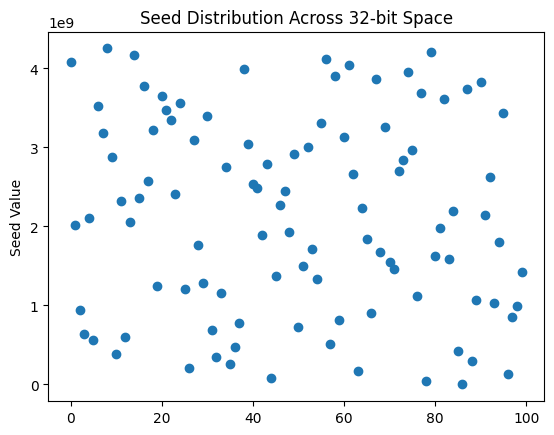

100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0001_seed4080218840.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0002_seed2018634584.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0003_seed944892784.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0004_seed644245080.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0005_seed2104533928.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0006_seed558345736.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0007_seed3521873104.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0008_seed3178275728.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0009_seed4252017528.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0010_seed2877628024.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0011_seed386547048.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0012_seed2319282288.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0013_seed601295408.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0014_seed2061584256.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0015_seed4166118184.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0016_seed2362231960.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0017_seed3779571136.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0018_seed2576980320.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0019_seed3221225400.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0020_seed1245540488.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0021_seed3650722120.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0022_seed3478923432.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0023_seed3350074416.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0024_seed2405181632.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0025_seed3564822776.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0026_seed1202590816.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0027_seed214748360.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0028_seed3092376384.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0029_seed1760936552.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0030_seed1288490160.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0031_seed3393024088.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0032_seed687194752.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0033_seed343597376.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0034_seed1159641144.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0035_seed2748779008.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0036_seed257698032.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0037_seed472446392.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0038_seed773094096.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0039_seed3994319496.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0040_seed3049426712.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0041_seed2534030648.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0042_seed2491080976.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0043_seed1889785568.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0044_seed2791728680.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0045_seed85899344.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0046_seed1374389504.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0047_seed2276332616.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0048_seed2448131304.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0049_seed1932735240.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0050_seed2920577696.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0051_seed730144424.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0052_seed1503238520.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0053_seed3006477040.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0054_seed1717986880.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0055_seed1331439832.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0056_seed3307124744.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0057_seed4123168512.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0058_seed515396064.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0059_seed3908420152.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0060_seed816043768.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0061_seed3135326056.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0062_seed4037269168.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0063_seed2662879664.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0064_seed171798688.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0065_seed2233382944.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0066_seed1846835896.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0067_seed901943112.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0068_seed3865470480.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0069_seed1675037208.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0070_seed3264175072.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0071_seed1546188192.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0072_seed1460288848.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0073_seed2705829336.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0074_seed2834678352.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0075_seed3951369824.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0076_seed2963527368.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0077_seed1116691472.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0078_seed3693671792.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0079_seed42949672.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0080_seed4209067856.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0081_seed1632087536.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0082_seed1975684912.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0083_seed3607772448.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0084_seed1589137864.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0085_seed2190433272.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0086_seed429496720.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0087_seed0.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0088_seed3736621464.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0089_seed300647704.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0090_seed1073741800.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0091_seed3822520808.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0092_seed2147483600.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0093_seed2619929992.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0094_seed1030792128.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0095_seed1803886224.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0096_seed3435973760.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0097_seed128849016.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0098_seed858993440.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0099_seed987842456.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/lawyer/lawyer_0100_seed1417339176.png

=== Generating 100 neutral-prompt images for: engineer ===


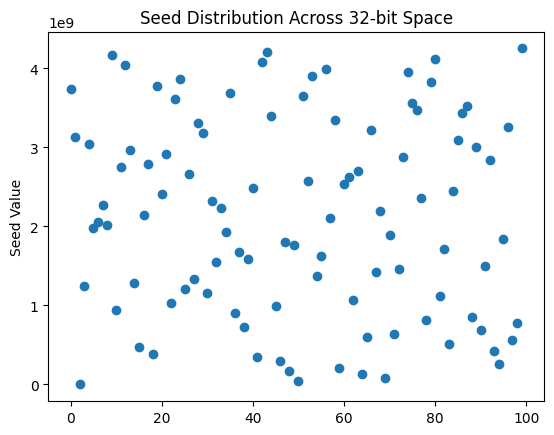

100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0001_seed3736621464.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0002_seed3135326056.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0003_seed0.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0004_seed1245540488.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0005_seed3049426712.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0006_seed1975684912.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0007_seed2061584256.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0008_seed2276332616.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0009_seed2018634584.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0010_seed4166118184.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0011_seed944892784.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0012_seed2748779008.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0013_seed4037269168.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0014_seed2963527368.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0015_seed1288490160.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0016_seed472446392.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0017_seed2147483600.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0018_seed2791728680.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0019_seed386547048.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0020_seed3779571136.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0021_seed2405181632.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0022_seed2920577696.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0023_seed1030792128.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0024_seed3607772448.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0025_seed3865470480.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0026_seed1202590816.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0027_seed2662879664.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0028_seed1331439832.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0029_seed3307124744.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0030_seed3178275728.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0031_seed1159641144.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0032_seed2319282288.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0033_seed1546188192.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0034_seed2233382944.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0035_seed1932735240.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0036_seed3693671792.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0037_seed901943112.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0038_seed1675037208.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0039_seed730144424.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0040_seed1589137864.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0041_seed2491080976.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0042_seed343597376.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0043_seed4080218840.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0044_seed4209067856.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0045_seed3393024088.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0046_seed987842456.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0047_seed300647704.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0048_seed1803886224.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0049_seed171798688.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0050_seed1760936552.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0051_seed42949672.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0052_seed3650722120.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0053_seed2576980320.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0054_seed3908420152.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0055_seed1374389504.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0056_seed1632087536.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0057_seed3994319496.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0058_seed2104533928.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0059_seed3350074416.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0060_seed214748360.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0061_seed2534030648.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0062_seed2619929992.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0063_seed1073741800.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0064_seed2705829336.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0065_seed128849016.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0066_seed601295408.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0067_seed3221225400.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0068_seed1417339176.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0069_seed2190433272.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0070_seed85899344.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0071_seed1889785568.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0072_seed644245080.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0073_seed1460288848.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0074_seed2877628024.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0075_seed3951369824.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0076_seed3564822776.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0077_seed3478923432.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0078_seed2362231960.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0079_seed816043768.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0080_seed3822520808.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0081_seed4123168512.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0082_seed1116691472.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0083_seed1717986880.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0084_seed515396064.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0085_seed2448131304.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0086_seed3092376384.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0087_seed3435973760.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0088_seed3521873104.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0089_seed858993440.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0090_seed3006477040.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0091_seed687194752.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0092_seed1503238520.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0093_seed2834678352.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0094_seed429496720.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0095_seed257698032.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0096_seed1846835896.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0097_seed3264175072.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0098_seed558345736.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0099_seed773094096.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/engineer/engineer_0100_seed4252017528.png

=== Generating 100 neutral-prompt images for: caregiver ===


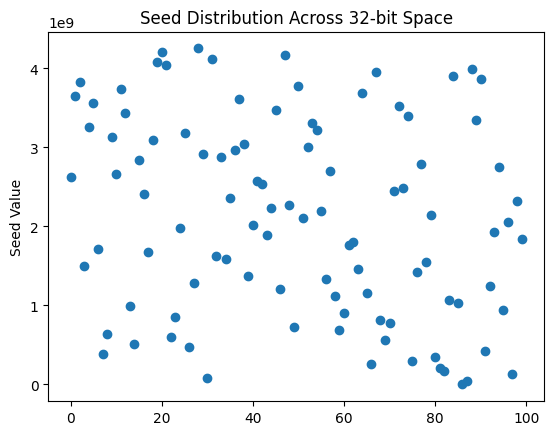

100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0001_seed2619929992.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0002_seed3650722120.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0003_seed3822520808.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0004_seed1503238520.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0005_seed3264175072.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0006_seed3564822776.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0007_seed1717986880.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0008_seed386547048.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0009_seed644245080.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0010_seed3135326056.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0011_seed2662879664.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0012_seed3736621464.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0013_seed3435973760.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0014_seed987842456.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0015_seed515396064.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0016_seed2834678352.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0017_seed2405181632.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0018_seed1675037208.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0019_seed3092376384.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0020_seed4080218840.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0021_seed4209067856.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0022_seed4037269168.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0023_seed601295408.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0024_seed858993440.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0025_seed1975684912.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0026_seed3178275728.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0027_seed472446392.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0028_seed1288490160.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0029_seed4252017528.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0030_seed2920577696.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0031_seed85899344.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0032_seed4123168512.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0033_seed1632087536.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0034_seed2877628024.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0035_seed1589137864.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0036_seed2362231960.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0037_seed2963527368.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0038_seed3607772448.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0039_seed3049426712.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0040_seed1374389504.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0041_seed2018634584.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0042_seed2576980320.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0043_seed2534030648.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0044_seed1889785568.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0045_seed2233382944.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0046_seed3478923432.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0047_seed1202590816.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0048_seed4166118184.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0049_seed2276332616.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0050_seed730144424.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0051_seed3779571136.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0052_seed2104533928.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0053_seed3006477040.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0054_seed3307124744.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0055_seed3221225400.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0056_seed2190433272.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0057_seed1331439832.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0058_seed2705829336.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0059_seed1116691472.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0060_seed687194752.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0061_seed901943112.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0062_seed1760936552.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0063_seed1803886224.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0064_seed1460288848.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0065_seed3693671792.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0066_seed1159641144.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0067_seed257698032.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0068_seed3951369824.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0069_seed816043768.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0070_seed558345736.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0071_seed773094096.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0072_seed2448131304.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0073_seed3521873104.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0074_seed2491080976.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0075_seed3393024088.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0076_seed300647704.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0077_seed1417339176.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0078_seed2791728680.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0079_seed1546188192.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0080_seed2147483600.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0081_seed343597376.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0082_seed214748360.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0083_seed171798688.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0084_seed1073741800.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0085_seed3908420152.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0086_seed1030792128.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0087_seed0.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0088_seed42949672.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0089_seed3994319496.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0090_seed3350074416.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0091_seed3865470480.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0092_seed429496720.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0093_seed1245540488.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0094_seed1932735240.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0095_seed2748779008.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0096_seed944892784.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0097_seed2061584256.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0098_seed128849016.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0099_seed2319282288.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/caregiver/caregiver_0100_seed1846835896.png

=== Generating 100 neutral-prompt images for: politician ===


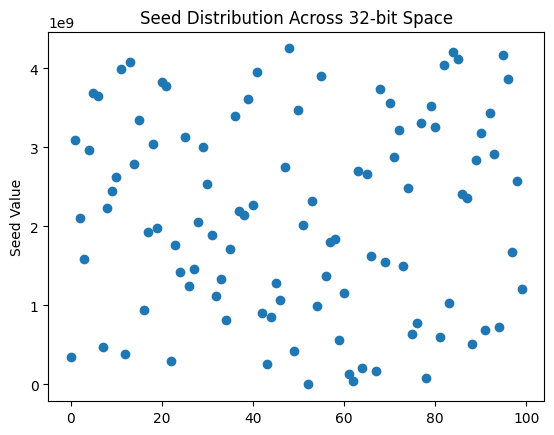

100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0001_seed343597376.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0002_seed3092376384.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0003_seed2104533928.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0004_seed1589137864.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0005_seed2963527368.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0006_seed3693671792.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0007_seed3650722120.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0008_seed472446392.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0009_seed2233382944.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0010_seed2448131304.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0011_seed2619929992.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0012_seed3994319496.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0013_seed386547048.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0014_seed4080218840.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0015_seed2791728680.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0016_seed3350074416.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0017_seed944892784.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0018_seed1932735240.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0019_seed3049426712.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0020_seed1975684912.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0021_seed3822520808.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0022_seed3779571136.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0023_seed300647704.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0024_seed1760936552.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0025_seed1417339176.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0026_seed3135326056.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0027_seed1245540488.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0028_seed1460288848.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0029_seed2061584256.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0030_seed3006477040.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0031_seed2534030648.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0032_seed1889785568.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0033_seed1116691472.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0034_seed1331439832.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0035_seed816043768.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0036_seed1717986880.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0037_seed3393024088.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0038_seed2190433272.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0039_seed2147483600.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0040_seed3607772448.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0041_seed2276332616.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0042_seed3951369824.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0043_seed901943112.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0044_seed257698032.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0045_seed858993440.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0046_seed1288490160.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0047_seed1073741800.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0048_seed2748779008.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0049_seed4252017528.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0050_seed429496720.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0051_seed3478923432.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0052_seed2018634584.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0053_seed0.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0054_seed2319282288.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0055_seed987842456.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0056_seed3908420152.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0057_seed1374389504.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0058_seed1803886224.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0059_seed1846835896.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0060_seed558345736.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0061_seed1159641144.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0062_seed128849016.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0063_seed42949672.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0064_seed2705829336.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0065_seed214748360.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0066_seed2662879664.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0067_seed1632087536.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0068_seed171798688.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0069_seed3736621464.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0070_seed1546188192.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0071_seed3564822776.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0072_seed2877628024.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0073_seed3221225400.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0074_seed1503238520.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0075_seed2491080976.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0076_seed644245080.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0077_seed773094096.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0078_seed3307124744.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0079_seed85899344.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0080_seed3521873104.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0081_seed3264175072.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0082_seed601295408.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0083_seed4037269168.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0084_seed1030792128.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0085_seed4209067856.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0086_seed4123168512.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0087_seed2405181632.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0088_seed2362231960.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0089_seed515396064.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0090_seed2834678352.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0091_seed3178275728.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0092_seed687194752.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0093_seed3435973760.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0094_seed2920577696.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0095_seed730144424.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0096_seed4166118184.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0097_seed3865470480.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0098_seed1675037208.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0099_seed2576980320.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/politician/politician_0100_seed1202590816.png

=== Generating 100 neutral-prompt images for: journalist ===


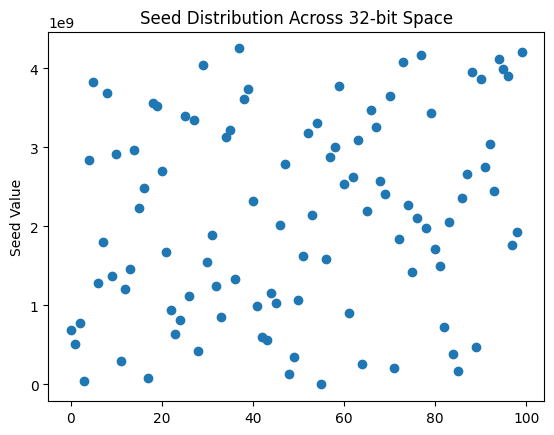

100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0001_seed687194752.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0002_seed515396064.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0003_seed773094096.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0004_seed42949672.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0005_seed2834678352.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0006_seed3822520808.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0007_seed1288490160.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0008_seed1803886224.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0009_seed3693671792.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0010_seed1374389504.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0011_seed2920577696.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0012_seed300647704.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0013_seed1202590816.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0014_seed1460288848.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0015_seed2963527368.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0016_seed2233382944.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0017_seed2491080976.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0018_seed85899344.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0019_seed3564822776.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0020_seed3521873104.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0021_seed2705829336.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0022_seed1675037208.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0023_seed944892784.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0024_seed644245080.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0025_seed816043768.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0026_seed3393024088.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0027_seed1116691472.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0028_seed3350074416.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0029_seed429496720.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0030_seed4037269168.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0031_seed1546188192.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0032_seed1889785568.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0033_seed1245540488.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0034_seed858993440.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0035_seed3135326056.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0036_seed3221225400.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0037_seed1331439832.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0038_seed4252017528.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0039_seed3607772448.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0040_seed3736621464.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0041_seed2319282288.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0042_seed987842456.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0043_seed601295408.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0044_seed558345736.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0045_seed1159641144.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0046_seed1030792128.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0047_seed2018634584.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0048_seed2791728680.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0049_seed128849016.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0050_seed343597376.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0051_seed1073741800.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0052_seed1632087536.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0053_seed3178275728.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0054_seed2147483600.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0055_seed3307124744.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0056_seed0.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0057_seed1589137864.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0058_seed2877628024.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0059_seed3006477040.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0060_seed3779571136.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0061_seed2534030648.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0062_seed901943112.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0063_seed2619929992.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0064_seed3092376384.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0065_seed257698032.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0066_seed2190433272.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0067_seed3478923432.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0068_seed3264175072.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0069_seed2576980320.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0070_seed2405181632.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0071_seed3650722120.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0072_seed214748360.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0073_seed1846835896.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0074_seed4080218840.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0075_seed2276332616.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0076_seed1417339176.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0077_seed2104533928.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0078_seed4166118184.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0079_seed1975684912.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0080_seed3435973760.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0081_seed1717986880.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0082_seed1503238520.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0083_seed730144424.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0084_seed2061584256.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0085_seed386547048.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0086_seed171798688.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0087_seed2362231960.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0088_seed2662879664.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0089_seed3951369824.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0090_seed472446392.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0091_seed3865470480.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0092_seed2748779008.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0093_seed3049426712.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0094_seed2448131304.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0095_seed4123168512.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0096_seed3994319496.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0097_seed3908420152.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0098_seed1760936552.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0099_seed1932735240.png


100%|████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.47it/s]


💾 Saved: ./qween_120_final/journalist/journalist_0100_seed4209067856.png

✅ Dataset generation complete with evenly distributed seeds for bias/fairness testing.


In [ ]:
# qwen_image_dataset_generator_neutral.py
import os
import random
import torch
from diffusers import DiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

# ================= CONFIG =================
LOCAL_MODEL_DIR = "./qwen_image_model"  # your saved local Qwen-Image dir
OUTPUT_DIR = "./qween_120_final"

DTYPE = torch.bfloat16  # Qwen-Image works well with bfloat16 on A100
NEGATIVE_PROMPT = "lowres, cartoon, sketch, watermark, text, extra fingers, blurry"

CATEGORIES = [
    'corporate CEO', 'doctor', 'nurse', 'scientist', 'teacher',
    'lawyer', 'engineer', 'caregiver', 'politician', 'journalist'
]

IMAGES_PER_CATEGORY = 100
HEIGHT, WIDTH = 1024, 768
NUM_STEPS = 28
GUIDANCE_SCALE = 7.5
SEED_MIN = 0
SEED_MAX = 2**32 - 1

# Neutral base prompt
PROMPT_TEMPLATE = (
    "A facial image of a {category}, in a professional setting, "
    "frontal orientation, realistic skin texture, Ultra HD, 4K, cinematic composition"
)

# ============ LOAD MODEL ============
print("📦 Loading Qwen-Image pipeline with balanced multi-GPU strategy...")
pipe = DiffusionPipeline.from_pretrained(
    LOCAL_MODEL_DIR,
    torch_dtype=DTYPE,
    device_map="balanced"  # works on your diffusers version
)
print("✅ Model loaded successfully.")


# ============ FUNCTIONS ============
def generate_image(pipe, prompt, negative_prompt, seed, steps, scale, height, width):
    generator = torch.Generator(device="cuda").manual_seed(seed)
    image = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        height=height,
        width=width,
        num_inference_steps=steps,
        guidance_scale=scale,
        generator=generator
    ).images[0]
    return image


def save_image(image, category, filename):
    category_dir = os.path.join(OUTPUT_DIR, category.replace(" ", "_"))
    os.makedirs(category_dir, exist_ok=True)
    filepath = os.path.join(category_dir, filename)
    image.save(filepath)
    print(f"💾 Saved: {filepath}")


def generate_evenly_distributed_seeds(num_seeds):
    """Generate seeds evenly spaced across full 32-bit range, then shuffle."""
    step = (SEED_MAX - SEED_MIN) // num_seeds
    seeds = [SEED_MIN + i * step for i in range(num_seeds)]
    random.shuffle(seeds)
    return seeds


# ============ MAIN ============
if __name__ == "__main__":
    for category in CATEGORIES:
        print(f"\n=== Generating {IMAGES_PER_CATEGORY} neutral-prompt images for: {category} ===")
        seeds = generate_evenly_distributed_seeds(IMAGES_PER_CATEGORY)

        plt.scatter(range(len(seeds)), seeds)
        plt.title("Seed Distribution Across 32-bit Space")
        plt.ylabel("Seed Value")
        plt.show()

        for i, seed in enumerate(seeds, start=1):
            prompt = PROMPT_TEMPLATE.format(category=category)
            img = generate_image(pipe, prompt, NEGATIVE_PROMPT, seed, NUM_STEPS, GUIDANCE_SCALE, HEIGHT, WIDTH)
            filename = f"{category.replace(' ', '_')}_{i:04d}_seed{seed}.png"
            save_image(img, category, filename)

    print("\n✅ Dataset generation complete with evenly distributed seeds for bias/fairness testing.")


In [ ]:
ls

 dataset_sd35/       flux_kontext_120_final/   ssldx_100_final/
 dataset_sd35_p2/    kandinsky_120_final/      stable_d_3_5_100/
 dataset_sd35_p3/    kandinsky.ipynb           stable_d_3_5_100_final/
 Deep_floyed.ipynb   models/                   stable_d_3_5_200/
 doctor.png          outputs/                 'stable deffusion 35.ipynb'
'dset till 4'/       qween_120_final/          Untitled1.ipynb
'dset till 4_.zip'   qwen_image_model/         Untitled.ipynb
 flux-Copy1.ipynb    sd35_model/
 flux.ipynb          sldx.ipynb
